# Estimación de F (modelos no paramétricos)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Función de distribución empírica

La función de distribución empírica para una muestra $X_1,...,X_n \sim F $ se define  $$\hat{F_n}(x) = \frac{1}{n} \sum_{i=1}^{n}I(X_i\leq x) $$

Es decir, le aplica PMF $ p_{X_i}(x) = p(X_i=x) = \frac{1}{n}$ a cada $X_i$

### Importo datos

Busco $n=100$ datos para estimar la distribución subyacente. Para el ejemplo voy a sacarlos de [este repositorio](https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves) pero pueden probar con cualquier dataset. En este caso son muestras de tiempos de duración de glitches encontrados en mediciones de LIGO.

(array([56.,  9., 15.,  6.,  1.,  0.,  1.,  0.,  2.,  1.,  2.,  3.,  3.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.01563   ,  0.87587278,  1.73611555,  2.59635833,  3.45660111,
         4.31684389,  5.17708667,  6.03732944,  6.89757222,  7.757815  ,
         8.61805778,  9.47830056, 10.33854333, 11.19878611, 12.05902889,
        12.91927167, 13.77951444, 14.63975722, 15.5       ]),
 <BarContainer object of 18 artists>)

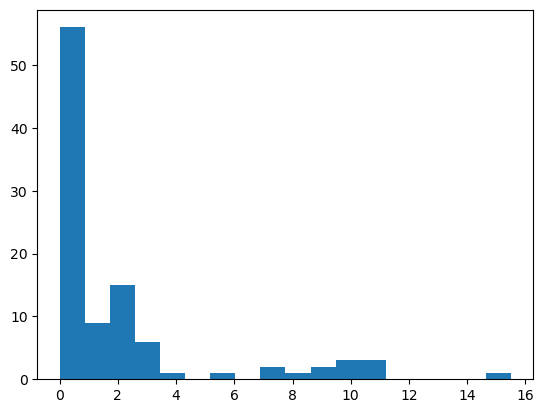

In [20]:
#Importo una muestra cualquiera
import pandas as pd
datos = pd.read_csv('trainingset_v1d1_metadata.csv', delimiter=',')
n = 100
sample_data = datos['duration'].sample(n=n)
sample = sample_data.values
plt.hist(sample,bins='auto')

In [21]:
#Defino la distribución empírica F_hat
F_hat = stats.ecdf(sample)

#Para trabajar con la CDF invocamos al atributo cdf y graficamos
ax = plt.subplot()

F_hat.cdf.plot(ax)

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

AttributeError: module 'scipy.stats' has no attribute 'ecdf'

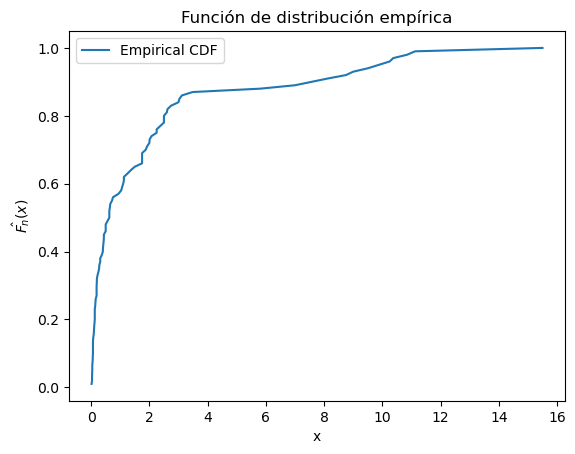

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF


F_hat = ECDF(sample)

ax = plt.subplot()

ax.plot(F_hat.x, F_hat.y, label='Empirical CDF')

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()
plt.show()


In [23]:
#F_hat.cdf tiene, a su vez, dos atributos:
x = F_hat.cdf.quantiles #array con los (X_1,...,X_n) de la muestra ordenados de menor a mayor
F = F_hat.cdf.probabilities #array con la CDF para cada valor correspondiente de x

ax = plt.subplot()

ax.step(x,F,where='post')
#F_hat.cdf.plot(ax,ls=':')

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

AttributeError: 'ECDF' object has no attribute 'cdf'

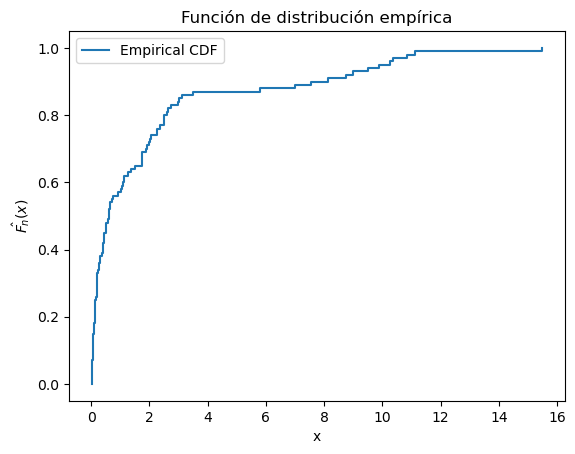

In [24]:
x = F_hat.x  # array con los (X_1,...,X_n) de la muestra ordenados de menor a mayor
F = F_hat.y  # array con la CDF para cada valor correspondiente de x

ax = plt.subplot()

# Graficamos la función de distribución empírica
ax.step(x, F, where='post', label='Empirical CDF')

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()
plt.show()

In [25]:
#Para evaluar F_hat en un valor arbitrario de x podemos usar el método evaluate(x)
F_hat.cdf.evaluate(2.0)

AttributeError: 'ECDF' object has no attribute 'cdf'

In [27]:
hat = F_hat(2.0)
print(hat)

0.72


### Funcionales estadísticos

Llamamos $T(F)$ a un funcional estadístico de una distribución $F$. Es cualquier cantidad que se pueda calcular como función de $F$ (ej: promedio, varianza, cuantiles, etc.)

Para obtener estimar cualquier $T(F)$ podemos usar el estimador "plug-in", que es simplemente reemplazar $F$ con $\hat{F_n}$.

Por ejemplo, la media de una variable aleatoria $X \sim F$ es

$$ \mu = E(X) =  \sum_{x}x p_X(x) \hspace{1cm} \text{(caso discreto)}$$
$$ \mu = E(X) =  \int x f_X(x)dx \hspace{1cm} \text{(caso continuo)} $$

Entonces, el estimador plug-in de $\mu$ será
$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n}X_i$$

es decir, el promedio muestral.

Resumidamente, podemos estimar cualquier funcional estadístico por su contraparte muestral.

In [28]:
#algunas características muestrales

#promedio
mean = np.mean(sample)

#varianza
var = np.var(sample)

#desvío estándar (sqrt(var))
std = np.std(sample)

#mediana
median = np.median(sample)

#cuantiles
quantile = np.quantile(sample,q = 0.25)

#asimetría: si es negativa, tiene una cola más larga a la izquierda; positiva, a la derecha
skewness = stats.skew(sample)

#correlación
sample_id = sample_data.index
sample_2 = datos.loc[sample_id, 'amplitude'].values
correlation = stats.pearsonr(sample,sample_2).statistic

print('media =',mean)
print('mediana =',median)
print('std =',std)
print('25-cuartil =',quantile)
print('asimetría = ',skewness)
print('correlación con Y:amplitud =',correlation)

media = 2.0059537941962486
mediana = 0.625
std = 3.146273760558748
25-cuartil = 0.15429750084877025
asimetría =  2.210079083326457
correlación con Y:amplitud = 0.26804713824125


### Intervalos de confianza

Podemos construír un intervalo de confianza de nivel $1-\alpha$ para $F$ donde los bordes inferiores y superiores $L(x)$ y $U(x)$ son:
$$ L(x) = \max(\hat{F_n}(x)-\epsilon_n,0)$$
$$ U(x) = \min(\hat{F_n}(x)+\epsilon_n,1)$$

con $ \epsilon_n = \sqrt{\frac{1}{2n}\log(\frac{2}{\alpha})} $

Con estos valores, $P(L(x)\leq F(x) \leq U(x) )\geq 1-\alpha$ para cualquier $F$.

In [29]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

low,up = confidence_interval_dkw(F_hat.cdf,alpha=0.05)


ax = plt.subplot()
ax.step(x,low,'r--',alpha=0.5,where='post')
ax.step(x,up,'r--',alpha=0.5,where='post')
F_hat.cdf.plot(ax)
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')


AttributeError: 'ECDF' object has no attribute 'cdf'

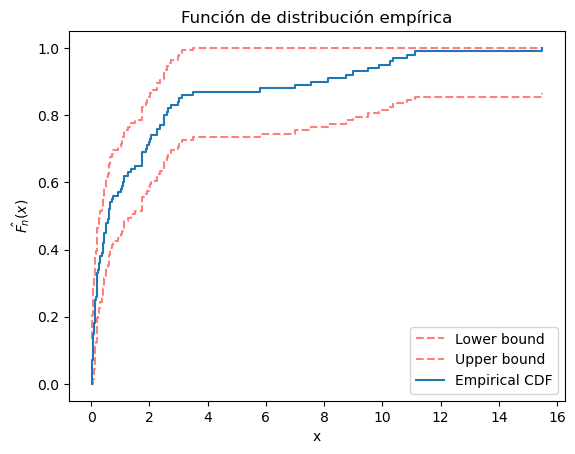

In [30]:
def confidence_interval_dkw(ecdf, alpha=0.05):
    L = []
    U = []
    n = len(ecdf.y)
    epsilon_n = np.sqrt(np.log(2/alpha) / (2*n))
    for i in range(n):
        L_i = max(ecdf.y[i] - epsilon_n, 0)
        U_i = min(ecdf.y[i] + epsilon_n, 1)
        L.append(L_i)
        U.append(U_i)
    return L, U

# Calculamos los intervalos de confianza
low, up = confidence_interval_dkw(F_hat, alpha=0.05)

# Obtenemos los cuantiles y las probabilidades
x = F_hat.x
F = F_hat.y

# Graficamos la función de distribución empírica y los intervalos de confianza
ax = plt.subplot()
ax.step(x, low, 'r--', alpha=0.5, where='post', label='Lower bound')
ax.step(x, up, 'r--', alpha=0.5, where='post', label='Upper bound')
ax.step(x, F, where='post', label='Empirical CDF')

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()
plt.show()

### Ejemplo con F~N(0,1)

Empecemos generando una muestra aleatoria $$X_1,...,X_{100} \sim \mathcal{N}(0,1) $$

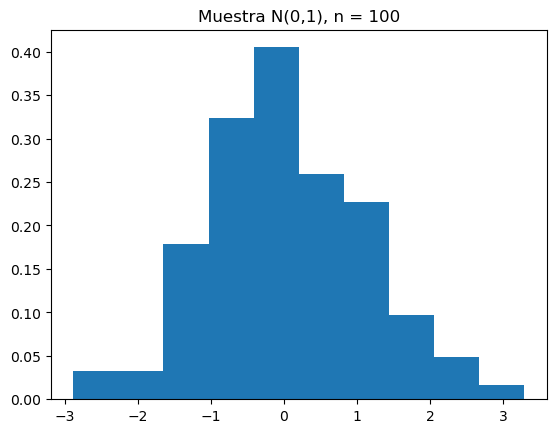

In [31]:
mu = 0
sigma = 1
n = 100

norm_sample = stats.norm.rvs(size=n,loc=mu,scale=sigma)

plt.hist(norm_sample, density=True, bins='auto')
plt.title('Muestra N(0,1), n = {}'.format(n))
plt.show()

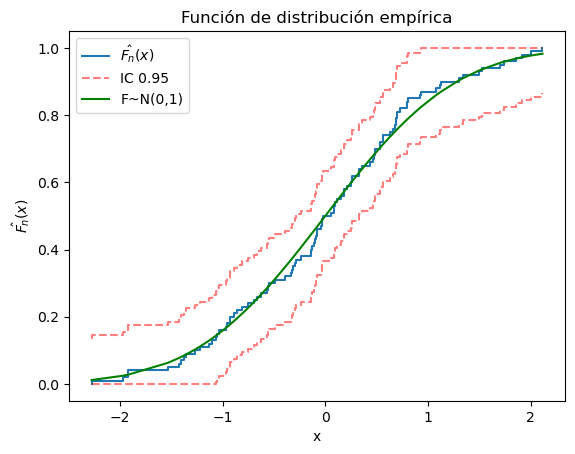

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats

# Obtenemos los cuantiles y las probabilidades
x = F_hat.x
F = F_hat.y

# Función para calcular el intervalo de confianza DKW
def confidence_interval_dkw(ecdf, alpha=0.05):
    L = []
    U = []
    n = len(ecdf.y)
    epsilon_n = np.sqrt(np.log(2/alpha) / (2*n))
    for i in range(n):
        L_i = max(ecdf.y[i] - epsilon_n, 0)
        U_i = min(ecdf.y[i] + epsilon_n, 1)
        L.append(L_i)
        U.append(U_i)
    return L, U

# Calculamos los intervalos de confianza
low, up = confidence_interval_dkw(F_hat, alpha=0.05)

# Graficamos la función de distribución empírica y los intervalos de confianza
ax = plt.subplot()
ax.step(x, F, where='post', label=r'$\hat{F_n}(x)$')
ax.step(x, low, 'r--', alpha=0.5, where='post', label='IC {}'.format(1-0.05))
ax.step(x, up, 'r--', alpha=0.5, where='post')
ax.plot(x, stats.norm.cdf(x), color='g', label='F~N(0,1)')

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()
plt.show()


### Ejercicio
Repetir el experimento 1000 veces con un IC de nivel 0.95 y registrar en cuántos casos el intervalo de confianza contiene completamente la función de distribución verdadera.

### Error y desvío estándar de $\hat{\mu}$
Particularmente para el estimador del promedio $\hat{\mu} = \bar{X_n}$ podemos calcular su desvío estándar, ya que es el error estándar del promedio muestral.

$$\text{se}(\hat{\mu}) = \sqrt{\text{var}(\bar{X_n})} = \frac{\sigma}{\sqrt{n}} $$

donde $\sigma$ es el desvío estándar de $X\sim F$. Por lo tanto, para estimar $\text{se}(\hat{\mu})$, reemplazamos $\sigma$ por $\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X_n})^{2}}$, el desvío estándar muestral.

También podemos estimar un intervalo de confianza de nivel $1-\alpha$ para $\hat{\mu}$ como
$$\hat{\text{IC}}(\hat{\mu}) = \hat{\mu} \pm z_{\frac{\alpha}{2}}\hat{\text{se}} $$

In [37]:
mean = np.mean(sample)
se_mean = std/np.sqrt(n)

alpha = 0.05
low = mean - stats.norm.ppf(1-alpha/2)*se_mean
up = mean + stats.norm.ppf(1-alpha/2)*se_mean

print('promedio =',mean)
print('error estándar del promedio =',se_mean)
print('IC = ',[low,up])

promedio = 2.0059537941962486
error estándar del promedio = 0.31462737605587476
IC =  [1.3892954685763943, 2.622612119816103]


### Ejercicio comparación de dos muestras

Tenemos muestras de tamaños de cráneos masculinos encontrados en Egipto que corresponden a dos épocas distintas. Los datos vienen de [este repositorio](https://dasl.datadescription.com/datafile/egyptians/?_sfm_methods=Comparing+Groups&_sfm_cases=4+59943).

Queremos saber si la media de los cráneos es la misma o cambió de una época a la otra. Para eso, hallar un estimador de $\theta = \mu_1-\mu_2$ y proporcionar un error estándar y un interavalo de confianza para este estimador. Decidir si son distintos o no

Text(0.5, 0, 'Tamaño de cráneos')

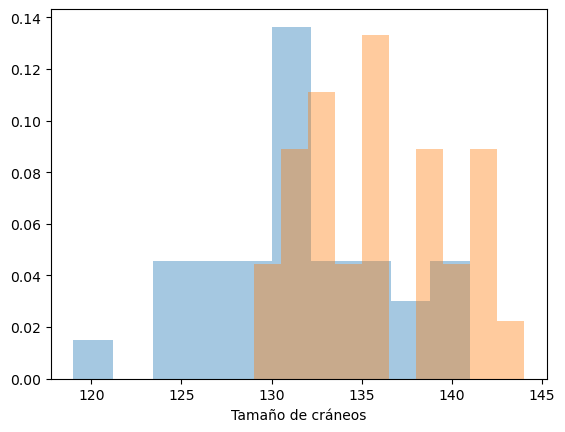

In [38]:
sample2 = pd.read_csv('egyptians.txt',delimiter='\t')
grupo1 = sample2['4000 BCE'].values
grupo2 = sample2['200 BCE'].values
plt.hist(grupo1,alpha=0.4,density=True,label = '4000 BCE')
plt.hist(grupo2,alpha=0.4,density=True, label = '200 BCE')
plt.xlabel('Tamaño de cráneos')